# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random);  # Reminding ourselves what we can do here

In [4]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [5]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=True, time_on_site=158.14346659486898, mobile=True), User(purchased=False, time_on_site=172.82926257336942, mobile=True), User(purchased=False, time_on_site=31.232005492075974, mobile=True), User(purchased=True, time_on_site=73.57331013462687, mobile=True), User(purchased=False, time_on_site=260.9496667383236, mobile=True), User(purchased=False, time_on_site=201.8036943152736, mobile=True), User(purchased=False, time_on_site=227.1962299493263, mobile=True), User(purchased=False, time_on_site=233.2113142717879, mobile=True), User(purchased=False, time_on_site=271.55505724744216, mobile=False), User(purchased=False, time_on_site=169.2206305369742, mobile=False)]


In [6]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,158.143467,True
1,False,172.829263,True
2,False,31.232005,True
3,True,73.573310,True
4,False,260.949667,True


In [7]:
import numpy as np
user_data.describe(exclude=[np.number])

,purchased,mobile
count,1000,1000
unique,2,2
top,False,True
freq,619,750


In [8]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.431165369713758,6.450353046825455,6.715723862056639,6.8787626411428775,7.338546053244536,7.507033972487696,7.605660191786732,7.667599536274966,7.788917842988294,8.443076133681702,9.02299442415596,9.6683308027831,9.81915091313264,10.57447811280034,10.86170788498865,11.528884042221563,11.838479695269578,11.957301525602173,12.367751327085966,12.412656291607965,12.414452609669326,12.721576287860842,13.229387682128987,13.23072340672006,14.18351303796205,14.20990799199036,14.481313876718042,14.630737157402093,14.790424336503671,15.514470722480914,15.571183325033445,15.962908136214157,16.495735483495608,16.554993274355837,16.877692264708372,16.941149317795947,16.96927499445735,17.146929279668598,17.237517386263082,17.30185702502466,...,511.72821568214044,511.8400035609658,514.745729425638,516.9594365219007,520.6075312537205,527.6475698511354,527.9966531711948,529.3877294831867,529.9017904521469,531.662003826231,531.6944110081592,532.887664740464,534.9860309090584,536.3768980021421,540.6759504985007,540.950575708561,550.1072028408065,551.9872466557335,552.9965736400699,554.9633152947966,557.015183675383,559.1996091307367,562.7540252370807,563.9042021643612,565.9652536760341,567.6307508529835,568.2919147510047,572.4097306979652,574.0563275612858,576.9218106381786,578.5957103661822,581.4182458349093,582.0739654500494,583.4796590316346,585.182626999388,586.4607767957381,590.9382061323921,595.7211639021159,595.781488483663,596.78666973893
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0,1,...,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1
True,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,...,0,1,1,1,1,0,1,0,0,1,0,0,1,0,1,1,1,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0,1,0,1,1,0,0


In [9]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.84, 123.702]","(123.702, 241.973]","(241.973, 360.244]","(360.244, 478.516]","(478.516, 596.787]"
purchased,,,,,
False,237,222,109,26,25
True,108,132,96,15,30


In [10]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.84, 123.702]","(123.702, 241.973]","(241.973, 360.244]","(360.244, 478.516]","(478.516, 596.787]"
purchased,,,,,
False,0.686957,0.627119,0.531707,0.634146,0.454545
True,0.313043,0.372881,0.468293,0.365854,0.545455


In [11]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.656,0.606667
True,0.344,0.393333


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [14]:
import pandas as pd
pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
exer_data=pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
exer_data.head(10)

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


In [0]:
pd.crosstab(exer_data['age'],exer_data['exercise_time']);

In [0]:
time_bins = pd.cut(exer_data['exercise_time'], 4)


In [17]:
!pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.1.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.2
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.180
botocore==1.12.180
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.10
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.2
dlib==19.16.0
dm-sonnet==1.33
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easy

In [35]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 592kB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [88]:
pd.crosstab(exer_data['age'],time_bins)

exercise_time,"(-0.3, 100.0]","(100.0, 200.0]","(200.0, 300.0]"
age,,,
18,5,9,6
19,10,8,5
20,5,7,5
21,3,8,7
22,8,8,3
23,6,10,5
24,6,7,4
25,6,5,8
26,3,4,8


In [89]:
pd.crosstab(exer_data['age'], time_bins, normalize='columns')

exercise_time,"(-0.3, 100.0]","(100.0, 200.0]","(200.0, 300.0]"
age,,,
18,0.009901,0.023438,0.019293
19,0.019802,0.020833,0.016077
20,0.009901,0.018229,0.016077
21,0.005941,0.020833,0.022508
22,0.015842,0.020833,0.009646
23,0.011881,0.026042,0.016077
24,0.011881,0.018229,0.012862
25,0.011881,0.013021,0.025723
26,0.005941,0.010417,0.025723


In [0]:
time_bins_age = pd.cut(exer_data['age'], 4)
time_bins_weight = pd.cut(exer_data['weight'], 4)

In [111]:
pd.crosstab(time_bins_age, time_bins, normalize='columns')

exercise_time,"(-0.3, 75.0]","(75.0, 150.0]","(150.0, 225.0]","(225.0, 300.0]"
age,,,,
"(17.938, 33.5]",0.219718,0.212209,0.340996,0.337500
"(33.5, 49.0]",0.197183,0.223837,0.272031,0.362500
"(49.0, 64.5]",0.194366,0.212209,0.245211,0.291667
"(64.5, 80.0]",0.388732,0.351744,0.141762,0.008333


In [112]:
ex = pd.crosstab(time_bins_age, [time_bins, time_bins_weight],normalize='columns')
ex

exercise_time     (-0.3, 75.0]      ...       (225.0, 300.0]
weight         (99.854, 136.5]      ...       (136.5, 173.0]
age                                 ...                     
(17.938, 33.5]        0.219512      ...             0.352273
(33.5, 49.0]          0.146341      ...             0.329545
(49.0, 64.5]          0.195122      ...             0.318182
(64.5, 80.0]          0.439024      ...             0.000000

[4 rows x 13 columns]

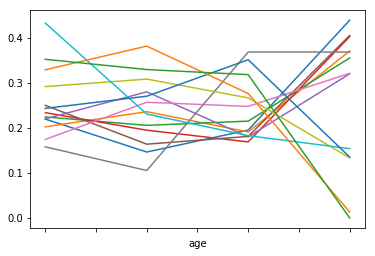

In [113]:
ex.plot(legend=False)

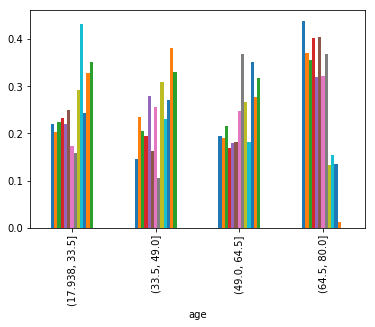

In [114]:
ex.plot(kind='bar', legend=False);

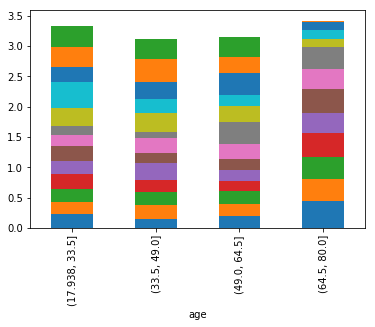

In [115]:
ex.plot(kind='bar', stacked=True, legend=False);

In [116]:
pt = pd.pivot_table(exer_data, values='weight', index=time_bins)
pt

,weight
exercise_time,
"(-0.3, 75.0]",172.723944
"(75.0, 150.0]",159.287791
"(150.0, 225.0]",141.095785
"(225.0, 300.0]",130.462500


In [117]:
pt2 = pd.pivot_table(exer_data, values='age', index=time_bins)
pt2

,age
exercise_time,
"(-0.3, 75.0]",53.436620
"(75.0, 150.0]",52.075581
"(150.0, 225.0]",43.436782
"(225.0, 300.0]",41.062500


In [118]:
pt3 = pd.pivot_table(exer_data, values=['age','weight'], index=time_bins)
pt3


,age,weight
exercise_time,,
"(-0.3, 75.0]",53.436620,172.723944
"(75.0, 150.0]",52.075581,159.287791
"(150.0, 225.0]",43.436782,141.095785
"(225.0, 300.0]",41.062500,130.462500


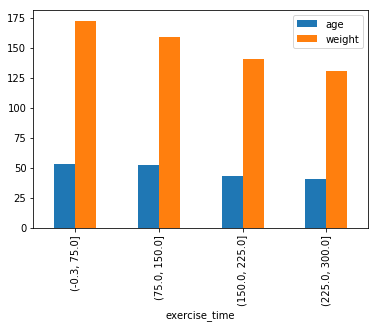

In [119]:
pt3.plot.bar()

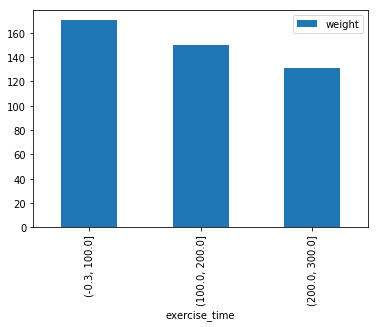

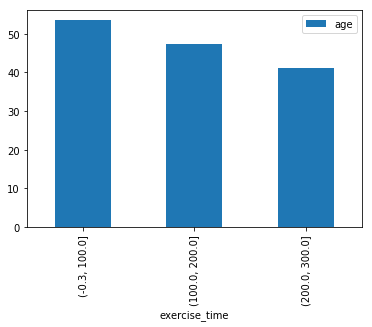

In [100]:
pt.plot.bar()
pt2.plot.bar()

In [124]:
ex = pd.crosstab(time_bins, [time_bins_age, time_bins_weight],
                 normalize='columns')
ex

age             (17.938, 33.5]      ...         (64.5, 80.0]
weight         (99.854, 136.5]      ...       (209.5, 246.0]
exercise_time                       ...                     
(-0.3, 75.0]             0.144      ...             0.815789
(75.0, 150.0]            0.176      ...             0.184211
(150.0, 225.0]           0.280      ...             0.000000
(225.0, 300.0]           0.400      ...             0.000000

[4 rows x 16 columns]

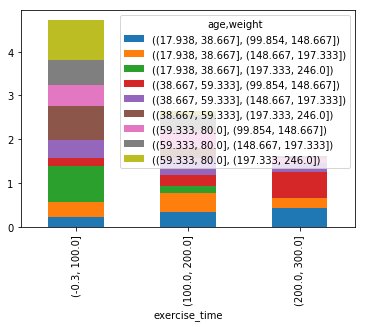

In [102]:
ex.plot(kind='bar', stacked=True)

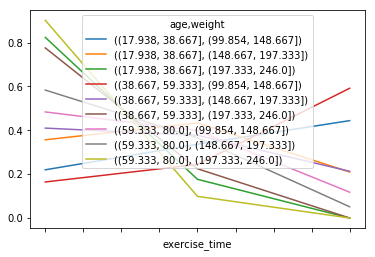

In [103]:
ex.plot()

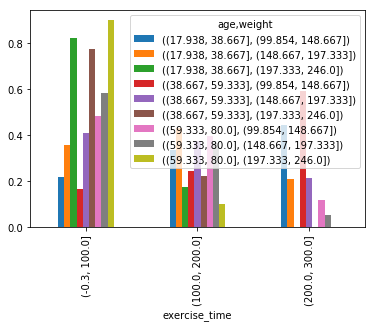

In [104]:
ex.plot(kind='bar')

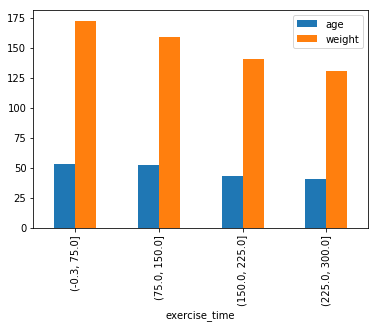

In [122]:
final_pt = pt3.plot.bar()
final_pt;

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


In [128]:
''' 1.weight(discrete), age(discrete), exercise time(continuous)
    2. higer age and weight correlates with lower exercise time
    3. none, all of them have relationship to each other''' 


' 1.weight(discrete), age(discrete), exercise time(continuous)\n    2. higer age and weight correlates with lower exercise time\n    3. none, all of them have relationship to each other'

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)